<a href="https://colab.research.google.com/github/harrietgilmour/SIAM_FaIR/blob/main/TCRE_sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Original TCRE of SIAM is 1.1/600 (0.00183 OR 1.83^c)

- IPCC AR6 TCRE range is 0.001 to 0.0023 (1.0-2.3^c) https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_TS.pdf 


In [ ]:
#import modules that are needed.

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

The impact of varying the climate sensitivity will be addressed using GD and D2022 scenarios

# Original SIAM climate sensitivity (0.00183) - GD scenario

In [ ]:
#creating lists of all PARAMETERS
#================================

years = list(range(1982,2101)) #list of years from 1982-2100 (1980-81 need to be calculated separately from the loop)
K_1980 = 450 #1980 total capital value (T$)
A = 0.06 #Total factor productivity (%/yr) (6%/yr)
sensitivity_GWP = 0.7 #emissions sensitivity to GWP (unitless) - 0.7 * capital^0.6
emissions_GWP_ratio = 0.6 #ratio of emissions to GWP growth
land_change_emissions = 1.5 #land use change emissions (GtC/yr)
delta_u_1980 = 250 #1980 cumulative emissions (GtC)
clim_sens = (1.1/600) #climate sensitivity (^c/GtC) *******************
base_decay = 0.03 #base decay rate of capital (%/yr) (3%/yr)
Sd = 0.0075 #decay sensitivity to global mean surface temperature change (%/yr/^c) (0.75%/yr/^c)
#emissions_scale = 3.793 #total global CO2 emissions in 1980 / emissions_1980

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980 = A*K_1980 #GWP in 1980 (T$/yr)
u_1980 = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980 = clim_sens*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980 = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K = (K_1980)+(y_1980)-base_decay*K_1980 #capital in 1981 (T$)
y = A*K #GWP in 1981 (T$/yr)
u = (0.7*y**0.6) #emissions rate in 1981 (GtC/yr)
delta_u = delta_u_1980+u+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t = clim_sens*delta_u #global mean surface temp change in 1981 (^C)
d = max(0.03,0.03+Sd*(delta_t-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate = (y-y_1980)/y_1980 #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series=[] #empty list for cumulative emissions
delta_u_full_series.append(delta_u_1980) #adding the 1980 value
delta_u_full_series.append(delta_u) #adding the 1981 value
print(delta_u_full_series)

#temperature change series:
delta_t_full_series=[]
delta_t_full_series.append(delta_t_1980)
delta_t_full_series.append(delta_t)
print(delta_t_full_series)

#total capital series:
K_full_series=[]
K_full_series.append(K_1980)
K_full_series.append(K)
print(K_full_series)

#emissions series:
u_full_series=[]
u_full_series.append(u_1980)
u_full_series.append(u)
print(u_full_series)

#capital decay rate series:
d_full_series=[]
d_full_series.append(d_1980)
d_full_series.append(d)
print(d_full_series)

#GWP series:
y_full_series=[]
y_full_series.append(y_1980)
y_full_series.append(y)
print(y_full_series)

#GWP growth rate series:
y_growth_rate_series=[]
y_growth_rate_series.append(0)
y_growth_rate_series.append(y_growth_rate)
print(y_growth_rate_series)

[250, 256.6477640585382]
[0.45833333333333337, 0.4705209007739867]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K = K+y-d*K
  y = A*K
  u = (0.7*y**0.6)
  delta_u = delta_u+u+land_change_emissions
  delta_t = clim_sens*delta_u
  d = max(0.03,0.03+Sd*(delta_t-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series.append(delta_u) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series.append(delta_t) #adding the temp change from 1982-2100
  K_full_series.append(K) #adding 1982-2100 total capital to the list
  u_full_series.append(u) #adding 1982-2100 emissions to the list
  d_full_series.append(d) #adding 1982-2100 capital decay rate to the list
  y_full_series.append(y) #adding 1982-2100 GWP to the list

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))

In [ ]:
GD=pd.DataFrame()

GD['Years']=years_full
GD['capital']=K_full_series
GD['GWP']=y_full_series
GD['emissions']=u_full_series
GD['cumulative_emissions']=delta_u_full_series
GD['temp_change']=delta_t_full_series
GD['decay_rate']=d_full_series
GD['total_GWP_growth_rate']=GD['GWP'].pct_change()

# High climate sensitivity (0.002) - GD scenario

In [ ]:
clim_sens_high = 0.0023 #IPCC high TCRE limit (2.3^c for every GtC)

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980_high = A*K_1980 #GWP in 1980 (T$/yr)
u_1980_high = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980_high = clim_sens_high*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980_high  = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K_high = (K_1980)+(y_1980_high)-base_decay*K_1980 #capital in 1981 (T$)
y_high = A*K_high #GWP in 1981 (T$/yr)
u_high = (0.7*y_high**0.6) #emissions rate in 1981 (GtC/yr)
delta_u_high = delta_u_1980+u_high+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t_high = clim_sens_high*delta_u_high #global mean surface temp change in 1981 (^C)
d_high = max(0.03,0.03+Sd*(delta_t_high-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate_high = (y_high-y_1980_high)/y_1980_high #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series_high=[] #empty list for cumulative emissions
delta_u_full_series_high.append(delta_u_1980) #adding the 1980 value
delta_u_full_series_high.append(delta_u_high) #adding the 1981 value
print(delta_u_full_series_high)

#temperature change series:
delta_t_full_series_high=[]
delta_t_full_series_high.append(delta_t_1980_high)
delta_t_full_series_high.append(delta_t_high)
print(delta_t_full_series_high)

#total capital series:
K_full_series_high=[]
K_full_series_high.append(K_1980)
K_full_series_high.append(K_high)
print(K_full_series_high)

#emissions series:
u_full_series_high=[]
u_full_series_high.append(u_1980_high)
u_full_series_high.append(u_high)
print(u_full_series_high)

#capital decay rate series:
d_full_series_high=[]
d_full_series_high.append(d_1980_high)
d_full_series_high.append(d_high)
print(d_full_series_high)

#GWP series:
y_full_series_high=[]
y_full_series_high.append(y_1980_high)
y_full_series_high.append(y_high)
print(y_full_series_high)

#GWP growth rate series:
y_growth_rate_series_high=[]
y_growth_rate_series_high.append(0)
y_growth_rate_series_high.append(y_growth_rate_high)
print(y_growth_rate_series_high)

[250, 256.6477640585382]
[0.575, 0.5902898573346379]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K_high = K_high+y_high-d_high*K_high
  y_high = A*K_high
  u_high = (0.7*y_high**0.6)
  delta_u_high = delta_u_high+u_high+land_change_emissions
  delta_t_high = clim_sens_high*delta_u_high
  d_high = max(0.03,0.03+Sd*(delta_t_high-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series_high.append(delta_u_high) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_high.append(delta_t_high) #adding the temp change from 1982-2100
  K_full_series_high.append(K_high) #adding 1982-2100 total capital to the list
  u_full_series_high.append(u_high) #adding 1982-2100 emissions to the list
  d_full_series_high.append(d_high) #adding 1982-2100 capital decay rate to the list
  y_full_series_high.append(y_high) #adding 1982-2100 GWP to the list

In [ ]:
GD_high=pd.DataFrame()

GD_high['Years']=years_full
GD_high['capital']=K_full_series_high
GD_high['GWP']=y_full_series_high
GD_high['emissions']=u_full_series_high
GD_high['cumulative_emissions']=delta_u_full_series_high
GD_high['temp_change']=delta_t_full_series_high
GD_high['decay_rate']=d_full_series_high
GD_high['total_GWP_growth_rate']=GD_high['GWP'].pct_change()

# Low climate sensitivity (0.001) - GD scenario

In [ ]:
clim_sens_low = 0.001 #(1^c/GtC)

In [ ]:
#calculating 1980 values (initial values for all variables in 1980)
#==================================================================

#already have initial capital (K_1980) and cumulative emissions (delta_u_1980) in parameters

y_1980_low = A*K_1980 #GWP in 1980 (T$/yr)
u_1980_low = (0.7*y_1980**0.6) #emissions rate in 1980 (GtC/yr)
delta_t_1980_low = clim_sens_low*delta_u_1980 #global mean surface temp change in 1980 (^C)
d_1980_low  = max(0.03,0.03+Sd*(delta_t_1980-1)) #capital decay rate in 1980 (%/yr)

In [ ]:
#calculating 1981 values (these need to be calculated as there are still specific equations for this year that can't go in the loop)
#===================================================================================================================================

K_low = (K_1980)+(y_1980_low)-base_decay*K_1980 #capital in 1981 (T$)
y_low = A*K_low #GWP in 1981 (T$/yr)
u_low = (0.7*y_low**0.6) #emissions rate in 1981 (GtC/yr)
delta_u_low = delta_u_1980+u_low+land_change_emissions #cumulative emissions in 1981 (GtC)
delta_t_low = clim_sens_low*delta_u_low #global mean surface temp change in 1981 (^C)
d_low = max(0.03,0.03+Sd*(delta_t_low-1)) #capital decay rate in 1981 (%/yr)
y_growth_rate_low = (y_low-y_1980_low)/y_1980_low #GWP growth rate in 1981 (%/yr)

In [ ]:
#creating the list that the 1980, 1981 and eventually 1982-2100 will be appended to:
#===================================================================================

#cumulative emissions series:
delta_u_full_series_low=[] #empty list for cumulative emissions
delta_u_full_series_low.append(delta_u_1980) #adding the 1980 value
delta_u_full_series_low.append(delta_u_low) #adding the 1981 value
print(delta_u_full_series_low)

#temperature change series:
delta_t_full_series_low=[]
delta_t_full_series_low.append(delta_t_1980_low)
delta_t_full_series_low.append(delta_t_low)
print(delta_t_full_series_low)

#total capital series:
K_full_series_low=[]
K_full_series_low.append(K_1980)
K_full_series_low.append(K_low)
print(K_full_series_low)

#emissions series:
u_full_series_low=[]
u_full_series_low.append(u_1980_low)
u_full_series_low.append(u_low)
print(u_full_series_low)

#capital decay rate series:
d_full_series_low=[]
d_full_series_low.append(d_1980_low)
d_full_series_low.append(d_low)
print(d_full_series_low)

#GWP series:
y_full_series_low=[]
y_full_series_low.append(y_1980_low)
y_full_series_low.append(y_low)
print(y_full_series_low)

#GWP growth rate series:
y_growth_rate_series_low=[]
y_growth_rate_series_low.append(0)
y_growth_rate_series_low.append(y_growth_rate_low)
print(y_growth_rate_series_low)

[250, 256.6477640585382]
[0.25, 0.25664776405853823]
[450, 463.5]
[5.057271839089452, 5.147764058538205]
[0.03, 0.03]
[27.0, 27.81]
[0, 0.029999999999999954]


In [ ]:
#creating an array of years between 1982-2100
#============================================
years_array=(np.array(years))


#go through loop for all variables to get from 1982 to 2100
#==========================================================
for x in range(0,years_array.size): #loop for the number of years between 1982-2100 (119)
  K_low = K_low+y_low-d_low*K_low
  y_low = A*K_low
  u_low = (0.7*y_low**0.6)
  delta_u_low = delta_u_low+u_low+land_change_emissions
  delta_t_low = clim_sens_low*delta_u_low
  d_low = max(0.03,0.03+Sd*(delta_t_low-1))
  #y_growth_rate = (y-[y-1])/[y-1]
  delta_u_full_series_low.append(delta_u_low) #adding the 1982-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_low.append(delta_t_low) #adding the temp change from 1982-2100
  K_full_series_low.append(K_low) #adding 1982-2100 total capital to the list
  u_full_series_low.append(u_low) #adding 1982-2100 emissions to the list
  d_full_series_low.append(d_low) #adding 1982-2100 capital decay rate to the list
  y_full_series_low.append(y_low) #adding 1982-2100 GWP to the list



In [ ]:
GD_low=pd.DataFrame()

GD_low['Years']=years_full
GD_low['capital']=K_full_series_low
GD_low['GWP']=y_full_series_low
GD_low['emissions']=u_full_series_low
GD_low['cumulative_emissions']=delta_u_full_series_low
GD_low['temp_change']=delta_t_full_series_low
GD_low['decay_rate']=d_full_series_low
GD_low['total_GWP_growth_rate']=GD_low['GWP'].pct_change()

# GD plot

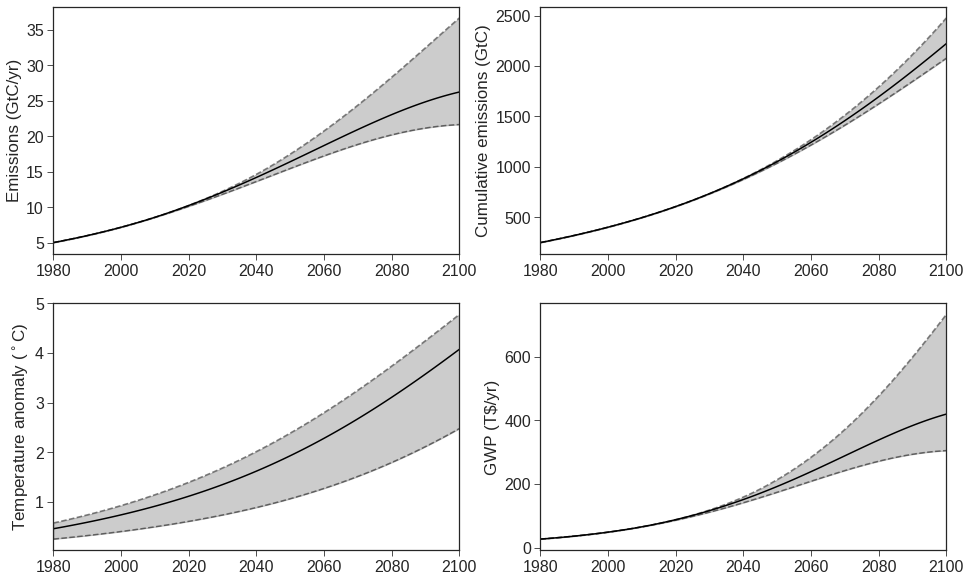

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))


#PLOTS
#=====
fig=(plt.figure(figsize=[16,10]))
plt.style.use('seaborn-ticks')

#plot of years vs. emissions following BAU scenario
#==========-==================================================
ax1=fig.add_subplot(221)
ax1.plot(GD['Years'],GD['emissions'], color='black')
ax1.plot(GD['Years'],GD_low['emissions'], color='black',linestyle='dashed',alpha=0.5)
ax1.plot(GD['Years'],GD_high['emissions'], color='black',linestyle='dashed',alpha=0.5)
ax1.fill_between(GD['Years'],GD_low['emissions'],GD_high['emissions'],color='black',alpha=0.2)
ax1.set_ylabel('Emissions (GtC/yr)',fontsize=17)

#plot of years vs. cumulative emissions following BAU scenario
#==========-==================================================
ax2=fig.add_subplot(222)
ax2.plot(GD['Years'],GD['cumulative_emissions'], color='black')
ax2.plot(GD['Years'],GD_low['cumulative_emissions'], color='black',linestyle='dashed',alpha=0.5)
ax2.plot(GD['Years'],GD_high['cumulative_emissions'], color='black',linestyle='dashed',alpha=0.5)
ax2.fill_between(GD['Years'],GD_low['cumulative_emissions'],GD_high['cumulative_emissions'],color='black',alpha=0.2)
ax2.set_ylabel('Cumulative emissions (GtC)',fontsize=17)

#plot of years vs. temperature change following BAU scenario
#===========================================================
ax3=fig.add_subplot(223)
ax3.plot(GD['Years'],GD['temp_change'], color='black')
ax3.plot(GD['Years'],GD_low['temp_change'], color='black',linestyle='dashed',alpha=0.5)
ax3.plot(GD['Years'],GD_high['temp_change'], color='black',linestyle='dashed',alpha=0.5)
ax3.fill_between(GD['Years'],GD_low['temp_change'],GD_high['temp_change'],color='black',alpha=0.2)
ax3.set_ylabel('Temperature anomaly ($^\circ$C)',fontsize=17)

#plot of years vs. GWP following BAU scenario
#============================================
ax4=fig.add_subplot(224)
ax4.plot(GD['Years'],GD['GWP'], color='black')
ax4.plot(GD['Years'],GD_low['GWP'], color='black',linestyle='dashed',alpha=0.5)
ax4.plot(GD['Years'],GD_high['GWP'], color='black',linestyle='dashed',alpha=0.5)
ax4.fill_between(GD['Years'],GD_low['GWP'],GD_high['GWP'],color='black',alpha=0.2)
ax4.set_ylabel('GWP (T$/yr)',fontsize=17)

#limits
ax1.set_xlim(1980,2100)
ax2.set_xlim(1980,2100)
ax3.set_xlim(1980,2100)
ax4.set_xlim(1980,2100)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax4.tick_params(axis='both', which='major', labelsize=16)


# Normal climate sensitivity - D2022

In [ ]:
#setting out the initial values for the HCE and LCE split in 2022
#================================================================

#Capital in 2020
HCE_K_2022=GD['capital'][42]*0.8 #High Carbon Economy total capital in 2020 (T$)
LCE_K_2022=GD['capital'][42]*0.2 #Low Carbon Economy total capital in 2020 (T$)

In [ ]:
#parameters needed for GWP calculations:

A=0.06 #aggregate energy productivity (%) (6%)
h=0.95 #how productive the LCE is compared to the HCE (%) (95%)
A_HCE=A/(0.8+0.2*h) #High Carbon Economy productivity (%)
A_LCE=h*A_HCE #Low Carbon Economy productivity (%)

#GWP
HCE_GWP_2022=HCE_K_2022*A_HCE #High Carbon Economy GWP in 2022 (T$/yr)
LCE_GWP_2022=LCE_K_2022*A_LCE #Low Carbon Economy GWP in 2022 (T$/yr)
Total_GWP_2022=HCE_GWP_2022+LCE_GWP_2022 #Total GWP in 2022(T$/yr)

#carbon intensity parameter
HCE_C_intensity_2022=GD['emissions'][42]/HCE_GWP_2022 #carbon intensity of the High Carbon Economy in 2022 (effects the emissions rate)
u_2022=HCE_C_intensity_2022*HCE_GWP_2022 #emissions in 2022 (GtC/yr), using the carbon intensity of HCE GWP in 2022

#setting the remaining 2022 values needed
delta_u_2022=GD['cumulative_emissions'][42] #cumulative emissions in 2022 (GtC)
delta_t_2022=GD['temp_change'][42] #temperature change in 2022 (^c)
d_2022=GD['decay_rate'][42] #high carbon infrastructure decay rate in 2022(%/yr) (3.08%/yr)

In [ ]:
#2023 values for decarbonisation scenario:
#=========================================

HCE_K=HCE_K_2022-d_2022*HCE_K_2022 #High Carbon Economy capital in 2023 (T$)
LCE_K=LCE_K_2022+Total_GWP_2022-d_2022*LCE_K_2022 #Low Carbon Economy capital in 2023 (T$)

HCE_GWP=HCE_K*A_HCE #High Carbon Economy GWP in 2023 (T$/yr)
LCE_GWP=LCE_K*A_LCE #Low Carbon Economy GWP in 2023 (T$/yr)
u_decarb=HCE_C_intensity_2022*HCE_GWP #total economy emissions in 2023 (GtC/yr)
delta_u_decarb=delta_u_2022+u_2022+land_change_emissions #total economy cumulative emissions in 2023 (GtC)
delta_t_decarb=clim_sens*delta_u_decarb #total economy temp change in 2023 (^c)
d_decarb=max(0.03,0.03+Sd*(delta_t_decarb-1)) #high carbon infrastructure decay rate (%/yr) in 2023
Total_GWP=HCE_GWP+LCE_GWP #total GWP in 2023 (T$/yr)

In [ ]:
#creating the list that the 2022, 2023 and eventually 2024-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series=[] #empty list for HCE capital 
HCE_K_full_series.append(HCE_K_2022) #adding the 2022 value to the list
HCE_K_full_series.append(HCE_K) #adding the 2021 value to the list
print(HCE_K_full_series)

LCE_K_full_series=[] #empty list for LCE capital
LCE_K_full_series.append(LCE_K_2022) #adding the 2022 value to the list
LCE_K_full_series.append(LCE_K) #adding the 2021 value to the list
print(LCE_K_full_series)


#GWP series:
HCE_GWP_full_series=[] #empty list for HCE GWP
HCE_GWP_full_series.append(HCE_GWP_2022)
HCE_GWP_full_series.append(HCE_GWP)
print(HCE_GWP_full_series)

LCE_GWP_full_series=[] #empty list for LCE GWP
LCE_GWP_full_series.append(LCE_GWP_2022)
LCE_GWP_full_series.append(LCE_GWP)
print(LCE_GWP_full_series)

Total_GWP_full_series=[] #empty list for total economy GWP 
Total_GWP_full_series.append(Total_GWP_2022)
Total_GWP_full_series.append(Total_GWP)
print(Total_GWP_full_series)


#emissions series:
u_full_series_decarb=[] #empty list for total economy emissions
u_full_series_decarb.append(u_2022)
u_full_series_decarb.append(u_decarb)
print(u_full_series_decarb)


#cumulative emissions series:
delta_u_full_series_decarb=[] #empty list for cumulative emissions
delta_u_full_series_decarb.append(delta_u_2022) 
delta_u_full_series_decarb.append(delta_u_decarb)
print(delta_u_full_series_decarb)


#temperature change series:
delta_t_full_series_decarb=[] #empty list for total economy temp change 
delta_t_full_series_decarb.append(delta_t_2022)
delta_t_full_series_decarb.append(delta_t_decarb)
print(delta_t_full_series_decarb)


#high C infrastructure decay rate series:
d_full_series_decarb=[] #empty list for high C infrastructure decay rate
d_full_series_decarb.append(d_2022)
d_full_series_decarb.append(d_decarb)
print(d_full_series_decarb)

[1241.3594746119652, 1202.6555286504738]
[310.3398686529913, 393.7658427585158]
[75.23390755224031, 72.88821385760447]
[17.868053043657074, 22.67136670427818]
[93.10196059589738, 95.55958056188265]
[10.62853326286016, 10.297149658458023]
[631.1765009869107, 643.3050342497709]
[1.157156918476003, 1.1793925627912467]
[0.031178676888570022, 0.03134544422093435]


In [ ]:
#creating an array of years between 2024-2100
#============================================
years_decarb = list(range(2024,2101)) #YEARS
years_array_decarb=(np.array(years_decarb))


#go through loop for all variables to get from 2024 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2024-2100
  delta_u_decarb = delta_u_decarb+u_decarb+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K = HCE_K-d_decarb*HCE_K #HCE capital (T$)
  LCE_K = LCE_K+Total_GWP-d_decarb*LCE_K #LCE capital (T$)
  HCE_GWP = A_HCE*HCE_K #HCE GWP (T$/yr)
  LCE_GWP = A_LCE*LCE_K #LCE GWP (T$/yr)
  Total_GWP = HCE_GWP+LCE_GWP #Total economy GWP (T$/yr)
  u_decarb = HCE_C_intensity_2022*HCE_GWP #emissions from HCE sector (GtC/yr) 
  delta_t_decarb = clim_sens*delta_u_decarb # temp change (^C)
  d_decarb = max(0.03,0.03+Sd*(delta_t_decarb-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb.append(delta_u_decarb) #adding the 2024-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb.append(delta_t_decarb) #adding the temp change from 2024-2100
  HCE_K_full_series.append(HCE_K) #adding 2024-2100 HCE capital to the list
  LCE_K_full_series.append(LCE_K) #adding 2024-2100 LCE capital to the list
  HCE_GWP_full_series.append(HCE_GWP)
  LCE_GWP_full_series.append(LCE_GWP)
  Total_GWP_full_series.append(Total_GWP)
  u_full_series_decarb.append(u_decarb)
  d_full_series_decarb.append(d_decarb)

In [ ]:
years_full_decarb = list(range(2022,2101)) #creating a new years array so that 2022 and 1981 are included and x and y shapes match

In [ ]:
D2022= pd.DataFrame()

D2022['Years']=years_full_decarb
D2022['HCE capital']=HCE_K_full_series
D2022['HCE GWP']=HCE_GWP_full_series
D2022['HCE GWP growth rate']=D2022['HCE GWP'].pct_change()
D2022['LCE capital']=LCE_K_full_series
D2022['LCE GWP']=LCE_GWP_full_series
D2022['LCE GWP growth rate']=D2022['LCE GWP'].pct_change()
D2022['emissions']=u_full_series_decarb
D2022['cumulative_emissions']=delta_u_full_series_decarb
D2022['temp_change']=delta_t_full_series_decarb
D2022['decay_rate']=d_full_series_decarb
D2022['capital']=D2022['HCE capital']+D2022['LCE capital']
D2022['GWP']=Total_GWP_full_series
D2022['total_GWP_growth_rate']=D2022['GWP'].pct_change()

In [ ]:
D2022

,Years,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate,emissions,cumulative_emissions,temp_change,decay_rate,capital,GWP,total_GWP_growth_rate
0,2022,1241.359475,75.233908,NaN,310.339869,17.868053,NaN,10.628533,631.176501,1.157157,0.031179,1551.699343,93.101961,NaN
1,2023,1202.655529,72.888214,-0.031179,393.765843,22.671367,0.268821,10.297150,643.305034,1.179393,0.031345,1596.421371,95.559581,0.026397
2,2024,1164.957757,70.603500,-0.031345,476.982658,27.462638,0.211336,9.974381,655.102184,1.201021,0.031508,1641.940415,98.066138,0.026230
3,2025,1128.252670,68.378950,-0.031508,560.020191,32.243587,0.174089,9.660112,666.576565,1.222057,0.031665,1688.272861,100.622536,0.026068
4,2026,1092.526066,66.213701,-0.031665,642.909449,37.015999,0.148011,9.354220,677.736676,1.242517,0.031819,1735.435515,103.229700,0.025910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,90.935725,5.511256,-0.036703,8523.161951,490.727506,0.021558,0.778593,1035.256148,1.897970,0.036735,8614.097676,496.238762,0.020873
75,2097,87.595222,5.308801,-0.036735,8706.304302,501.272066,0.021488,0.749991,1037.534741,1.902147,0.036766,8793.899524,506.580867,0.020841
76,2098,84.374687,5.113617,-0.036766,8892.788291,512.009023,0.021419,0.722417,1039.784732,1.906272,0.036797,8977.162978,517.122640,0.020810
77,2099,81.269948,4.925451,-0.036797,9082.682644,522.942334,0.021354,0.695834,1042.007149,1.910346,0.036828,9163.952592,527.867785,0.020779


In [ ]:
#slicing the BAU dataframe to get just 1980-2021:

df3= pd.DataFrame()

df3=GD[0:42]
df3

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000
5,1985,521.673333,31.300400,5.526217,284.176565,0.520990,0.030000,0.030000
6,1986,537.323533,32.239412,5.625101,291.301665,0.534053,0.030000,0.030000
7,1987,553.443239,33.206594,5.725753,298.527419,0.547300,0.030000,0.030000
8,1988,570.046537,34.202792,5.828207,305.855626,0.560735,0.030000,0.030000
9,1989,587.147933,35.228876,5.932494,313.288120,0.574362,0.030000,0.030000


In [ ]:
#combining the BAU 1980-2021 dataframe (df3) with the D2022 dataframe (df2)

dfD2022 = [df3, D2022]

D2022 = pd.concat(dfD2022)
display(D2022)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,8614.097676,496.238762,0.778593,1035.256148,1.897970,0.036735,0.020873,90.935725,5.511256,-0.036703,8523.161951,490.727506,0.021558
75,2097,8793.899524,506.580867,0.749991,1037.534741,1.902147,0.036766,0.020841,87.595222,5.308801,-0.036735,8706.304302,501.272066,0.021488
76,2098,8977.162978,517.122640,0.722417,1039.784732,1.906272,0.036797,0.020810,84.374687,5.113617,-0.036766,8892.788291,512.009023,0.021419
77,2099,9163.952592,527.867785,0.695834,1042.007149,1.910346,0.036828,0.020779,81.269948,4.925451,-0.036797,9082.682644,522.942334,0.021354


# High climate sensitivity - D2022

In [ ]:
#2021 values for decarbonisation scenario:
#=========================================

HCE_K_high=HCE_K_2022-d_2022*HCE_K_2022 #High Carbon Economy capital in 2021 (T$)
LCE_K_high=LCE_K_2022+Total_GWP_2022-d_2022*LCE_K_2022 #high Carbon Economy capital in 2021 (T$)

HCE_GWP_high=HCE_K_high*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP_high=LCE_K_high*A_LCE #high Carbon Economy GWP in 2021 (T$/yr)
u_decarb_high=HCE_C_intensity_2022*HCE_GWP_high #total economy emissions in 2021 (GtC/yr)
delta_u_decarb_high=delta_u_2022+u_2022+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb_high=clim_sens_high*delta_u_decarb_high #total economy temp change in 2021 (^c)
d_decarb_high=max(0.03,0.03+Sd*(delta_t_decarb_high-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP_high=HCE_GWP_high+LCE_GWP_high #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2020, 2021 and eventually 2022-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_high=[] #empty list for HCE capital 
HCE_K_full_series_high.append(HCE_K_2022) #adding the 2020 value to the list
HCE_K_full_series_high.append(HCE_K_high) #adding the 2021 value to the list
print(HCE_K_full_series_high)

LCE_K_full_series_high=[] #empty list for LCE capital
LCE_K_full_series_high.append(LCE_K_2022) #adding the 2020 value to the list
LCE_K_full_series_high.append(LCE_K_high) #adding the 2021 value to the list
print(LCE_K_full_series_high)


#GWP series:
HCE_GWP_full_series_high=[] #empty list for HCE GWP
HCE_GWP_full_series_high.append(HCE_GWP_2022)
HCE_GWP_full_series_high.append(HCE_GWP_high)
print(HCE_GWP_full_series_high)

LCE_GWP_full_series_high=[] #empty list for LCE GWP
LCE_GWP_full_series_high.append(LCE_GWP_2022)
LCE_GWP_full_series_high.append(LCE_GWP_high)
print(LCE_GWP_full_series_high)

Total_GWP_full_series_high=[] #empty list for total economy GWP 
Total_GWP_full_series_high.append(Total_GWP_2022)
Total_GWP_full_series_high.append(Total_GWP_high)
print(Total_GWP_full_series_high)


#emissions series:
u_full_series_decarb_high=[] #empty list for total economy emissions
u_full_series_decarb_high.append(u_2022)
u_full_series_decarb_high.append(u_decarb_high)
print(u_full_series_decarb_high)


#cumulative emissions series:
delta_u_full_series_decarb_high=[] #empty list for cumulative emissions
delta_u_full_series_decarb_high.append(delta_u_2022) 
delta_u_full_series_decarb_high.append(delta_u_decarb_high)
print(delta_u_full_series_decarb_high)


#temperature change series:
delta_t_full_series_decarb_high=[] #empty list for total economy temp change 
delta_t_full_series_decarb_high.append(delta_t_2022)
delta_t_full_series_decarb_high.append(delta_t_decarb_high)
print(delta_t_full_series_decarb_high)


#high C infrastructure decay rate series:
d_full_series_decarb_high=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_high.append(d_2022)
d_full_series_decarb_high.append(d_decarb_high)
print(d_full_series_decarb_high)

[1241.3594746119652, 1202.6555286504738]
[310.3398686529913, 393.7658427585158]
[75.23390755224031, 72.88821385760447]
[17.868053043657074, 22.67136670427818]
[93.10196059589738, 95.55958056188265]
[10.62853326286016, 10.297149658458023]
[631.1765009869107, 643.3050342497709]
[1.157156918476003, 1.479601578774473]
[0.031178676888570022, 0.033597011840808544]


In [ ]:
#go through loop for all variables to get from 2022 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2022-2100
  delta_u_decarb_high = delta_u_decarb_high+u_decarb_high+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_high = HCE_K_high-d_decarb_high*HCE_K_high #HCE capital (T$)
  LCE_K_high = LCE_K_high+Total_GWP_high-d_decarb_high*LCE_K_high#LCE capital (T$)
  HCE_GWP_high = A_HCE*HCE_K_high #HCE GWP (T$/yr)
  LCE_GWP_high = A_LCE*LCE_K_high #LCE GWP (T$/yr)
  Total_GWP_high = HCE_GWP_high+LCE_GWP_high #Total economy GWP (T$/yr)
  u_decarb_high = HCE_C_intensity_2022*HCE_GWP_high #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_high = clim_sens_high*delta_u_decarb_high # temp change (^C)
  d_decarb_high = max(0.03,0.03+Sd*(delta_t_decarb_high-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_high.append(delta_u_decarb_high) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_high.append(delta_t_decarb_high) #adding the temp change from 2022-2100
  HCE_K_full_series_high.append(HCE_K_high) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_high.append(LCE_K_high) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_high.append(HCE_GWP_high)
  LCE_GWP_full_series_high.append(LCE_GWP_high)
  Total_GWP_full_series_high.append(Total_GWP_high)
  u_full_series_decarb_high.append(u_decarb_high)
  d_full_series_decarb_high.append(d_decarb_high)

print(np.size(HCE_K_full_series_high))
print(delta_u_full_series_decarb_high)
print(delta_t_full_series_decarb_high)
print(HCE_K_full_series_high)
print(LCE_K_full_series_high)
print(HCE_GWP_full_series_high)
print(LCE_GWP_full_series_high)
print(Total_GWP_full_series_high)
print(u_full_series_decarb_high)
print(d_full_series_decarb_high)

79
[631.1765009869107, 643.3050342497709, 655.1021839082289, 666.5533801076851, 677.668220773896, 688.4561756467114, 698.9265774154192, 709.0886138277801, 718.9513207221239, 728.5235759322126, 737.8140940151816, 746.8314217536939, 755.5839343844693, 764.0798325065439, 772.3271396239451, 780.3337002789154, 788.1071787333536, 795.6550581577515, 802.9846402885645, 810.1030455166483, 817.0172133711068, 823.7339033646198, 830.2596961680325, 836.6009950836889, 842.7640277886661, 848.7548483207125, 854.5793392812938, 860.2432142317163, 865.7520202598106, 871.1111406961188, 876.3257979599408, 881.4010565169467, 886.341825931359, 891.1528639969472, 895.8387799322571, 900.4040376266215, 904.8529589245618, 909.1897269372014, 913.4183893702638, 917.5428618591279, 921.566931302261, 925.4942591851419, 929.32838488754, 933.0727289677072, 936.7305964177003, 940.3051798846557, 943.799562853411, 947.2167227863949, 950.5595342171968, 953.8307717946831, 957.0331132749513, 960.1691424587959, 963.2413520727

In [ ]:
D2022_high= pd.DataFrame()

D2022_high['Years']=years_full_decarb
D2022_high['HCE capital']=HCE_K_full_series_high
D2022_high['HCE GWP']=HCE_GWP_full_series_high
D2022_high['HCE GWP growth rate']=D2022_high['HCE GWP'].pct_change()
D2022_high['LCE capital']=LCE_K_full_series_high
D2022_high['LCE GWP']=LCE_GWP_full_series_high
D2022_high['LCE GWP growth rate']=D2022_high['LCE GWP'].pct_change()
D2022_high['emissions']=u_full_series_decarb_high
D2022_high['cumulative_emissions']=delta_u_full_series_decarb_high
D2022_high['temp_change']=delta_t_full_series_decarb_high
D2022_high['decay_rate']=d_full_series_decarb_high
D2022_high['capital']=D2022_high['HCE capital']+D2022_high['LCE capital']
D2022_high['GWP']=Total_GWP_full_series_high
D2022_high['total_GWP_growth_rate']=D2022_high['GWP'].pct_change()

In [ ]:
#combining the BAU 1980-2021 dataframe (df3) with the D2022 dataframe (df2)

dfD2022_high = [df3, D2022_high]

D2022_high = pd.concat(dfD2022_high)
display(D2022_high)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,6959.499807,400.918285,0.621070,1018.748456,2.343121,0.040073,0.017539,72.537843,4.396233,-0.040036,6886.961964,396.522052,0.018216
75,2097,7081.527197,407.935296,0.596181,1020.869526,2.348000,0.040110,0.017502,69.631004,4.220061,-0.040073,7011.896193,403.715235,0.018141
76,2098,7205.422442,415.060195,0.572269,1022.965707,2.352821,0.040146,0.017466,66.838104,4.050794,-0.040110,7138.584338,411.009401,0.018068
77,2099,7331.212606,422.294528,0.549294,1025.037976,2.357587,0.040182,0.017430,64.154811,3.888170,-0.040146,7267.057795,418.406358,0.017997


# Low climate sensitivity - D2022

In [ ]:
#2021 values for decarbonisation scenario:
#=========================================

HCE_K_low=HCE_K_2022-d_2022*HCE_K_2022 #High Carbon Economy capital in 2021 (T$)
LCE_K_low=LCE_K_2022+Total_GWP_2022-d_2022*LCE_K_2022 #Low Carbon Economy capital in 2021 (T$)

HCE_GWP_low=HCE_K_low*A_HCE #High Carbon Economy GWP in 2021 (T$/yr)
LCE_GWP_low=LCE_K_low*A_LCE #Low Carbon Economy GWP in 2021 (T$/yr)
u_decarb_low=HCE_C_intensity_2022*HCE_GWP_low #total economy emissions in 2021 (GtC/yr)
delta_u_decarb_low=delta_u_2022+u_2022+land_change_emissions #total economy cumulative emissions in 2021 (GtC)
delta_t_decarb_low=clim_sens_low*delta_u_decarb_low #total economy temp change in 2021 (^c)
d_decarb_low=max(0.03,0.03+Sd*(delta_t_decarb_low-1)) #high carbon infrastructure decay rate (%/yr) in 2021
Total_GWP_low=HCE_GWP_low+LCE_GWP_low #total GWP in 2021 (T$/yr)

In [ ]:
#creating the list that the 2020, 2021 and eventually 2022-2100 will be appended to:
#===================================================================================

#capital series:
HCE_K_full_series_low=[] #empty list for HCE capital 
HCE_K_full_series_low.append(HCE_K_2022) #adding the 2020 value to the list
HCE_K_full_series_low.append(HCE_K_low) #adding the 2021 value to the list
print(HCE_K_full_series_low)

LCE_K_full_series_low=[] #empty list for LCE capital
LCE_K_full_series_low.append(LCE_K_2022) #adding the 2020 value to the list
LCE_K_full_series_low.append(LCE_K_low) #adding the 2021 value to the list
print(LCE_K_full_series_low)


#GWP series:
HCE_GWP_full_series_low=[] #empty list for HCE GWP
HCE_GWP_full_series_low.append(HCE_GWP_2022)
HCE_GWP_full_series_low.append(HCE_GWP_low)
print(HCE_GWP_full_series_low)

LCE_GWP_full_series_low=[] #empty list for LCE GWP
LCE_GWP_full_series_low.append(LCE_GWP_2022)
LCE_GWP_full_series_low.append(LCE_GWP_low)
print(LCE_GWP_full_series_low)

Total_GWP_full_series_low=[] #empty list for total economy GWP 
Total_GWP_full_series_low.append(Total_GWP_2022)
Total_GWP_full_series_low.append(Total_GWP_low)
print(Total_GWP_full_series_low)


#emissions series:
u_full_series_decarb_low=[] #empty list for total economy emissions
u_full_series_decarb_low.append(u_2022)
u_full_series_decarb_low.append(u_decarb_low)
print(u_full_series_decarb_low)


#cumulative emissions series:
delta_u_full_series_decarb_low=[] #empty list for cumulative emissions
delta_u_full_series_decarb_low.append(delta_u_2022) 
delta_u_full_series_decarb_low.append(delta_u_decarb_low)
print(delta_u_full_series_decarb_low)


#temperature change series:
delta_t_full_series_decarb_low=[] #empty list for total economy temp change 
delta_t_full_series_decarb_low.append(delta_t_2022)
delta_t_full_series_decarb_low.append(delta_t_decarb_low)
print(delta_t_full_series_decarb_low)


#high C infrastructure decay rate series:
d_full_series_decarb_low=[] #empty list for high C infrastructure decay rate
d_full_series_decarb_low.append(d_2022)
d_full_series_decarb_low.append(d_decarb_low)
print(d_full_series_decarb_low)

[1241.3594746119652, 1202.6555286504738]
[310.3398686529913, 393.7658427585158]
[75.23390755224031, 72.88821385760447]
[17.868053043657074, 22.67136670427818]
[93.10196059589738, 95.55958056188265]
[10.62853326286016, 10.297149658458023]
[631.1765009869107, 643.3050342497709]
[1.157156918476003, 0.6433050342497709]
[0.031178676888570022, 0.03]


In [ ]:
#go through loop for all variables to get from 2022 to 2100
#==========================================================
for x in range(0,years_array_decarb.size): #loop for the number of years between 2022-2100
  delta_u_decarb_low = delta_u_decarb_low+u_decarb_low+land_change_emissions #cumulative emissions equation (GtC)
  HCE_K_low = HCE_K_low-d_decarb_low*HCE_K_low #HCE capital (T$)
  LCE_K_low = LCE_K_low+Total_GWP_low-d_decarb_low*LCE_K_low#LCE capital (T$)
  HCE_GWP_low = A_HCE*HCE_K_low #HCE GWP (T$/yr)
  LCE_GWP_low = A_LCE*LCE_K_low #LCE GWP (T$/yr)
  Total_GWP_low = HCE_GWP_low+LCE_GWP_low #Total economy GWP (T$/yr)
  u_decarb_low = HCE_C_intensity_2022*HCE_GWP_low #emissions from HCE sector (GtC/yr) 
  delta_t_decarb_low = clim_sens_low*delta_u_decarb_low # temp change (^C)
  d_decarb_low = max(0.03,0.03+Sd*(delta_t_decarb_low-1)) #high C capital decay rate (%/yr)

  #appending values created in loop to their subsequent lists
  delta_u_full_series_decarb_low.append(delta_u_decarb_low) #adding the 2022-2100 cumulative emissions values to the list in previous cell
  delta_t_full_series_decarb_low.append(delta_t_decarb_low) #adding the temp change from 2022-2100
  HCE_K_full_series_low.append(HCE_K_low) #adding 2022-2100 HCE capital to the list
  LCE_K_full_series_low.append(LCE_K_low) #adding 2022-2100 LCE capital to the list
  HCE_GWP_full_series_low.append(HCE_GWP_low)
  LCE_GWP_full_series_low.append(LCE_GWP_low)
  Total_GWP_full_series_low.append(Total_GWP_low)
  u_full_series_decarb_low.append(u_decarb_low)
  d_full_series_decarb_low.append(d_decarb_low)

print(np.size(HCE_K_full_series_low))
print(delta_u_full_series_decarb_low)
print(delta_t_full_series_decarb_low)
print(HCE_K_full_series_low)
print(LCE_K_full_series_low)
print(HCE_GWP_full_series_low)
print(LCE_GWP_full_series_low)
print(Total_GWP_full_series_low)
print(u_full_series_decarb_low)
print(d_full_series_decarb_low)

79
[631.1765009869107, 643.3050342497709, 655.1021839082289, 666.5904190769331, 677.7790071905763, 688.6769376608102, 699.292930216937, 709.63544299638, 719.7126803924398, 729.5326006666178, 739.1029233325704, 748.4311363185444, 757.5245029149393, 766.3900685134422, 775.0346671439901, 783.4649278156215, 791.687280667104, 799.707962933042, 807.5330247310019, 815.168334675023, 822.6195853207234, 829.8922984470529, 836.9918301795924, 843.9233759601558, 850.6919753673022, 857.3025167922343, 863.7597419744184, 870.068250401137, 876.232503575054, 882.2568291537535, 888.145424965092, 893.9023629020904, 899.5315927009789, 905.0369456059007, 910.4221379236748, 915.6907744719157, 920.8463519237093, 925.8922620519492, 930.8317948763419, 935.6681417160028, 940.4043981504739, 945.0435668919108, 949.5885605711046, 954.0422044399227, 958.4072389926762, 962.6863225088471, 966.8820335195328, 970.996873199898, 975.0332676898522, 978.9935703451077, 982.8800639207057, 986.6949626890356, 990.4404144943156,

In [ ]:
D2022_low= pd.DataFrame()

D2022_low['Years']=years_full_decarb
D2022_low['HCE capital']=HCE_K_full_series_low
D2022_low['HCE GWP']=HCE_GWP_full_series_low
D2022_low['HCE GWP growth rate']=D2022_low['HCE GWP'].pct_change()
D2022_low['LCE capital']=LCE_K_full_series_low
D2022_low['LCE GWP']=LCE_GWP_full_series_low
D2022_low['LCE GWP growth rate']=D2022_low['LCE GWP'].pct_change()
D2022_low['emissions']=u_full_series_decarb_low
D2022_low['cumulative_emissions']=delta_u_full_series_decarb_low
D2022_low['temp_change']=delta_t_full_series_decarb_low
D2022_low['decay_rate']=d_full_series_decarb_low
D2022_low['capital']=D2022_low['HCE capital']+D2022_low['LCE capital']
D2022_low['GWP']=Total_GWP_full_series_low
D2022_low['total_GWP_growth_rate']=D2022_low['GWP'].pct_change()

In [ ]:
#combining the BAU 1980-2021 dataframe (df3) with the D2022 dataframe (df2)

dfD2022_low = [df3, D2022_low]

D2022_low = pd.concat(dfD2022_low)
display(D2022_low)

,Years,capital,GWP,emissions,cumulative_emissions,temp_change,decay_rate,total_GWP_growth_rate,HCE capital,HCE GWP,HCE GWP growth rate,LCE capital,LCE GWP,LCE GWP growth rate
0,1980,450.000000,27.000000,5.057272,250.000000,0.458333,0.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,463.500000,27.810000,5.147764,256.647764,0.470521,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,477.405000,28.644300,5.239875,263.387640,0.482877,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,491.727150,29.503629,5.333635,270.221275,0.495406,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,506.478964,30.388738,5.429072,277.150347,0.508109,0.030000,0.030000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2096,12033.587861,693.235630,1.109538,1058.861292,1.058861,0.030441,0.027154,129.588461,7.853846,-0.030422,11903.999400,685.381784,0.027854
75,2097,12360.503511,712.046092,1.075762,1061.470830,1.061471,0.030461,0.027134,125.643599,7.614764,-0.030441,12234.859912,704.431328,0.027794
76,2098,12696.035919,731.353027,1.042993,1064.046592,1.064047,0.030480,0.027115,121.816366,7.382810,-0.030461,12574.219554,723.970217,0.027737
77,2099,13040.409335,751.169336,1.011202,1066.589585,1.066590,0.030499,0.027095,118.103360,7.157779,-0.030480,12922.305974,744.011556,0.027683


# GD + D2022 plot

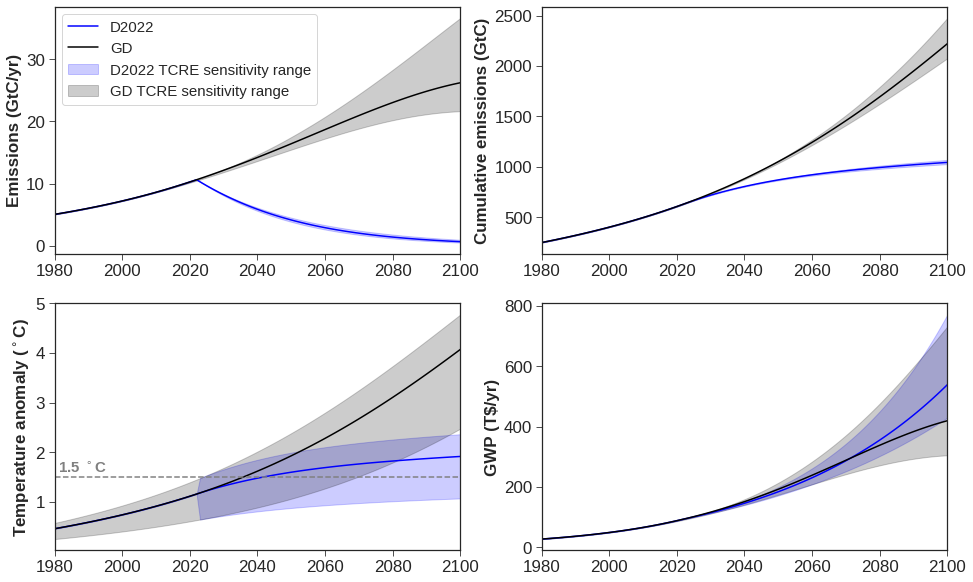

In [ ]:
#creating an array that includes all years from 1980-2100
#========================================================
years_full = list(range(1980,2101)) #creating a new years array so that 1980 and 1981 are included and x and y shapes match
years_array_full=(np.array(years_full))


#PLOTS
#=====
fig=(plt.figure(figsize=[16,10]))
plt.style.use('seaborn-ticks')

#plot of years vs. emissions following BAU scenario
#==========-==================================================
ax1=fig.add_subplot(221)

ax1.plot(D2022['Years'],D2022['emissions'], color='blue',label='D2022')
#ax1.plot(D2022_low['Years'],D2022_low['emissions'], color='blue',linestyle='dashed',alpha=0.5)
#ax1.plot(D2022_high['Years'],D2022_high['emissions'], color='blue',linestyle='dashed',alpha=0.5)
ax1.fill_between(D2022_low['Years'],D2022_low['emissions'],D2022_high['emissions'],color='blue',alpha=0.2,label='D2022 TCRE sensitivity range')

ax1.plot(GD['Years'],GD['emissions'], color='black',label='GD')
#ax1.plot(GD['Years'],GD_low['emissions'], color='black',linestyle='dashed',alpha=0.5)
#ax1.plot(GD['Years'],GD_high['emissions'], color='black',linestyle='dashed',alpha=0.5)
ax1.fill_between(GD['Years'],GD_low['emissions'],GD_high['emissions'],color='black',alpha=0.2,label='GD TCRE sensitivity range')

ax1.set_ylabel('Emissions (GtC/yr)',fontsize=17,weight='bold')

#plot of years vs. cumulative emissions following BAU scenario
#==========-==================================================
ax2=fig.add_subplot(222)

ax2.plot(D2022['Years'],D2022['cumulative_emissions'], color='blue')
#ax2.plot(D2022_low['Years'],D2022_low['cumulative_emissions'], color='blue',linestyle='dashed',alpha=0.5)
#ax2.plot(D2022_low['Years'],D2022_high['cumulative_emissions'], color='blue',linestyle='dashed',alpha=0.5)
ax2.fill_between(D2022_low['Years'],D2022_low['cumulative_emissions'],D2022_high['cumulative_emissions'],color='blue',alpha=0.2)

ax2.plot(GD['Years'],GD['cumulative_emissions'], color='black')
#ax2.plot(GD['Years'],GD_low['cumulative_emissions'], color='black',linestyle='dashed',alpha=0.5)
#ax2.plot(GD['Years'],GD_high['cumulative_emissions'], color='black',linestyle='dashed',alpha=0.5)
ax2.fill_between(GD['Years'],GD_low['cumulative_emissions'],GD_high['cumulative_emissions'],color='black',alpha=0.2)
                 
ax2.set_ylabel('Cumulative emissions (GtC)',fontsize=17,weight='bold')

#plot of years vs. temperature change following BAU scenario
#===========================================================
ax3=fig.add_subplot(223)

ax3.plot(D2022['Years'],D2022['temp_change'], color='blue')
#ax3.plot(D2022_low['Years'],D2022_low['temp_change'], color='blue',linestyle='dashed',alpha=0.5)
#ax3.plot(D2022_low['Years'],D2022_high['temp_change'], color='blue',linestyle='dashed',alpha=0.5)
ax3.fill_between(D2022_low['Years'],D2022_low['temp_change'],D2022_high['temp_change'],color='blue',alpha=0.2)

ax3.plot(GD['Years'],GD['temp_change'], color='black')
#ax3.plot(GD['Years'],GD_low['temp_change'], color='black',linestyle='dashed',alpha=0.5)
#ax3.plot(GD['Years'],GD_high['temp_change'], color='black',linestyle='dashed',alpha=0.5)
ax3.fill_between(GD['Years'],GD_low['temp_change'],GD_high['temp_change'],color='black',alpha=0.2)

ax3.set_ylabel('Temperature anomaly ($^\circ$C)',fontsize=17,weight='bold')
ax3.axhline(y=1.5,color='grey',linestyle='dashed')
ax3.text(1981,1.6,'1.5 $^\circ$C',fontsize=15,color='grey',weight='bold')

#plot of years vs. GWP following BAU scenario
#============================================
ax4=fig.add_subplot(224)

ax4.plot(D2022['Years'],D2022['GWP'], color='blue')
#ax4.plot(D2022_low['Years'],D2022_low['GWP'], color='blue',linestyle='dashed',alpha=0.5)
#ax4.plot(D2022_high['Years'],D2022_high['GWP'], color='blue',linestyle='dashed',alpha=0.5)
ax4.fill_between(D2022_low['Years'],D2022_low['GWP'],D2022_high['GWP'],color='blue',alpha=0.2)

ax4.plot(GD['Years'],GD['GWP'], color='black')
#ax4.plot(GD['Years'],GD_low['GWP'], color='black',linestyle='dashed',alpha=0.5)
#ax4.plot(GD['Years'],GD_high['GWP'], color='black',linestyle='dashed',alpha=0.5)
ax4.fill_between(GD['Years'],GD_low['GWP'],GD_high['GWP'],color='black',alpha=0.2)

ax4.set_ylabel('GWP (T$/yr)',fontsize=17,weight='bold')

#limits
ax1.set_xlim(1980,2100)
ax2.set_xlim(1980,2100)
ax3.set_xlim(1980,2100)
ax4.set_xlim(1980,2100)

ax1.tick_params(axis='both', which='major', labelsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax3.tick_params(axis='both', which='major', labelsize=17)
ax4.tick_params(axis='both', which='major', labelsize=17)

ax1.legend(loc='upper left',fontsize=15,frameon=True)


In [ ]:
D2022_high['temp_change'][78]

2.3623007215351404